##### Energy Consumption EDA

In [1]:
# Step-1: Data Ingestion

import pandas as pd
df = pd.read_csv('energy_consumption_countries.csv', keep_default_na=None, na_values= ["", "NA"])
df.head(3)

,Rank,Country,Total Consumption (TWh),Coal (%),Coal_Source_Type,Oil (%),Oil_Source_Type,Natural Gas (%),Natural_Gas_Source_Type,Nuclear (%),Nuclear_Source_Type,Hydro (%),Hydro_Source_Type,Other Renewables (%),Other_Renewables_Source_Type,Biomass/Traditional (%),Biomass_Source_Type,Per Capita (MWh/person)
0,1,China,179000,56,Thermal,20,Thermal/Chemical,9,Thermal,2,Thermal,3,Kinetic,12,Photonic/Kinetic,0,Chemical/Thermal,12.7
1,2,United States,93000,10,Thermal,28,Thermal/Chemical,33,Thermal,9,Thermal,2,Kinetic,12,Photonic/Kinetic,0,Chemical/Thermal,27.3
2,3,India,39000,44,Thermal,23,Thermal/Chemical,6,Thermal,2,Thermal,1,Kinetic,6,Photonic/Kinetic,24,Chemical/Thermal,2.8


In [ ]:
# Step-2: Data Sanity (Duplicates, Null Values, etc..)

duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print('Duplicates exist', duplicates_count, 'Removing Duplicates...')
    df.drop_duplicates(keep='first').reset_index(drop=True)
    duplicates_count = df.duplicated().sum()
    print('Removed Duplicates..')
else:
    print('Duplicates does not exist')

# Create a replacer method to do the above replacing values
def replacer(df):
    cat_cols = df.select_dtypes(include='object').columns; num_cols = df.select_dtypes(include='number').columns
    for col in df.columns:
        if col in cat_cols:
            mode = df[col].mode()[0]; df[col] = df[col].fillna(mode)
        if col in num_cols:
            mean = df[col].mean(); df[col] = df[col].fillna(mean)

m = df.isna().sum()
mm = m[m > 0]
if mm.size > 0:
    print('Nulls exist.', mm.size)
    replacer(df)
else:
    print('Nulls does not exist', mm.size)

# Shape and structure
print(f"Shape: {df.shape}")

# Summary statistics
df.info()


Duplicates does not exist
Nulls does not exist 0
Shape: (25, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          25 non-null     int64  
 1   Country                       25 non-null     object 
 2   Total Consumption (TWh)       25 non-null     int64  
 3   Coal (%)                      25 non-null     int64  
 4   Coal_Source_Type              25 non-null     object 
 5   Oil (%)                       25 non-null     int64  
 6   Oil_Source_Type               25 non-null     object 
 7   Natural Gas (%)               25 non-null     int64  
 8   Natural_Gas_Source_Type       25 non-null     object 
 9   Nuclear (%)                   25 non-null     int64  
 10  Nuclear_Source_Type           25 non-null     object 
 11  Hydro (%)                     25 non-null     int64  
 12  H

In [ ]:
# Step-3 - Perform descriptive statistics
cat = list(df.columns[df.dtypes == "object"])
df[cat].describe().T

,count,unique,top,freq
Country,25,25,China,1
Coal_Source_Type,25,1,Thermal,25
Oil_Source_Type,25,1,Thermal/Chemical,25
Natural_Gas_Source_Type,25,1,Thermal,25
Nuclear_Source_Type,25,1,Thermal,25
Hydro_Source_Type,25,1,Kinetic,25
Other_Renewables_Source_Type,25,1,Photonic/Kinetic,25
Biomass_Source_Type,25,1,Chemical/Thermal,25


In [32]:
!uv add matplotlib
!uv add seaborn

Resolved 128 packages in 3ms
Audited 124 packages in 0.06ms
Resolved 128 packages in 5ms
Audited 124 packages in 0.06ms


<Axes: xlabel='Country'>

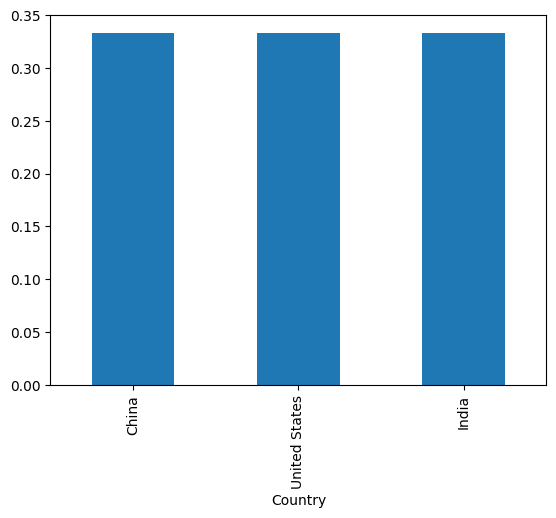

In [30]:
con = list(df.columns[df.dtypes != "object"])
df[con].describe().T.round(2)
df["Country"].head(3).value_counts(2).plot(kind='bar')

In [34]:
# Step 4 - Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns

import matplotlib.pyplot as plt
import seaborn as sns


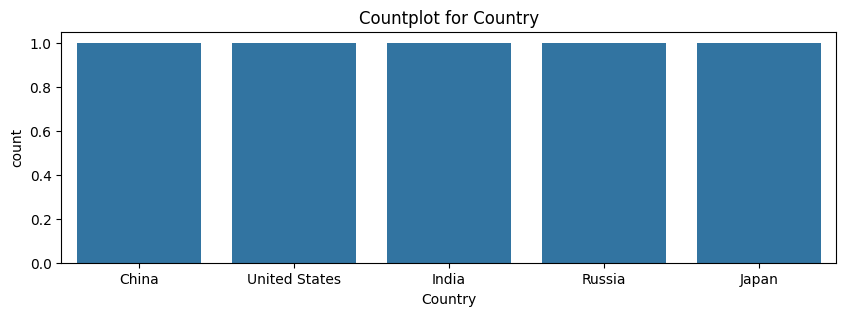

In [39]:
# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(10, 3)) # Set figure size (width, height)
sns.countplot(data=df.head(5), x="Country") # Plot Graph
plt.title("Countplot for Country") # Add Title
plt.show()

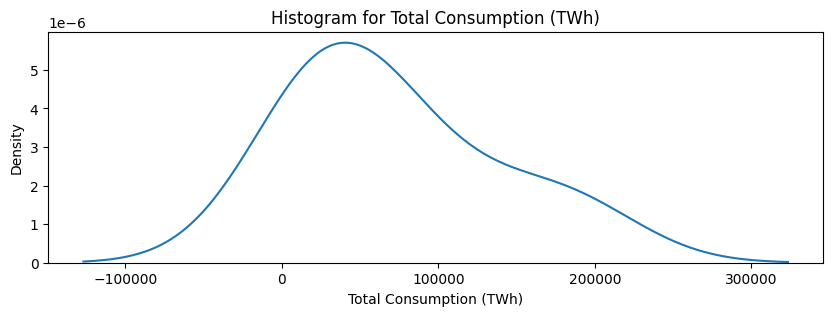

In [52]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()
plt.figure(figsize=(10,3))
sns.kdeplot(data=df.head(5), x='Total Consumption (TWh)')
plt.title('Histogram for Total Consumption (TWh)')
plt.show()

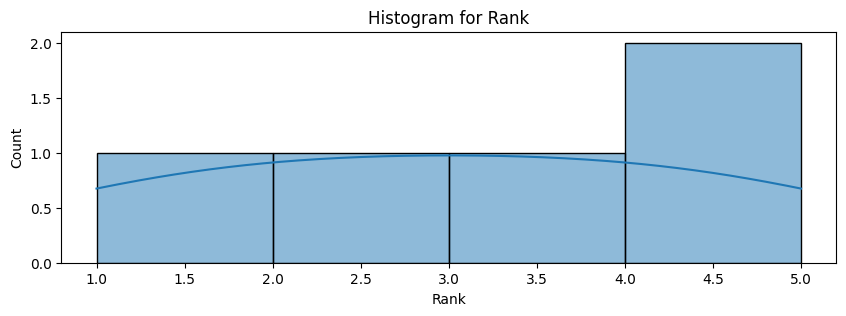

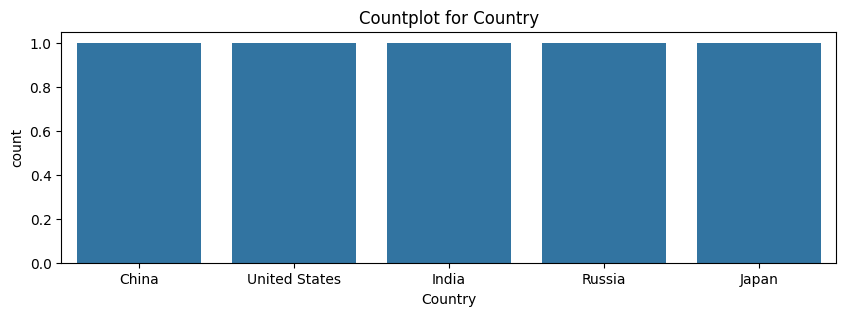

In [54]:
for col in con:
    plot_histogram(df.head(5), col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(5), col)
    break # Just breaking for one column

In [55]:
# Bivariate Analysis
    # Analyze two variables at a time
    # 1.continuous vs continuous -> scatterplot, regplot
    # 2.categorical vs continuous -> boxplot
    # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.show()

con, cat

(['Rank',
  'Total Consumption (TWh)',
  'Coal (%)',
  'Oil (%)',
  'Natural Gas (%)',
  'Nuclear (%)',
  'Hydro (%)',
  'Other Renewables (%)',
  'Biomass/Traditional (%)',
  'Per Capita (MWh/person)'],
 ['Country',
  'Coal_Source_Type',
  'Oil_Source_Type',
  'Natural_Gas_Source_Type',
  'Nuclear_Source_Type',
  'Hydro_Source_Type',
  'Other_Renewables_Source_Type',
  'Biomass_Source_Type'])

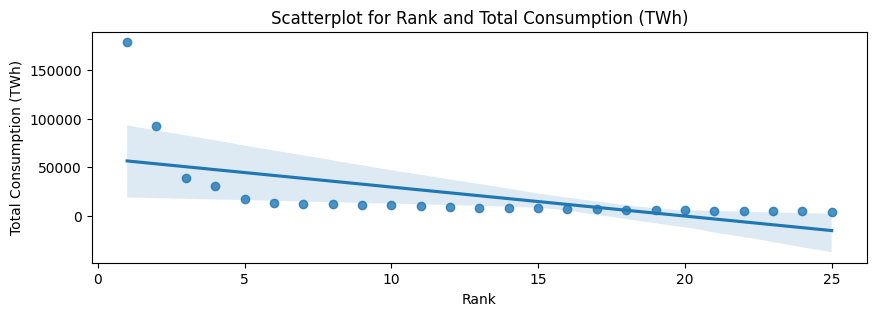

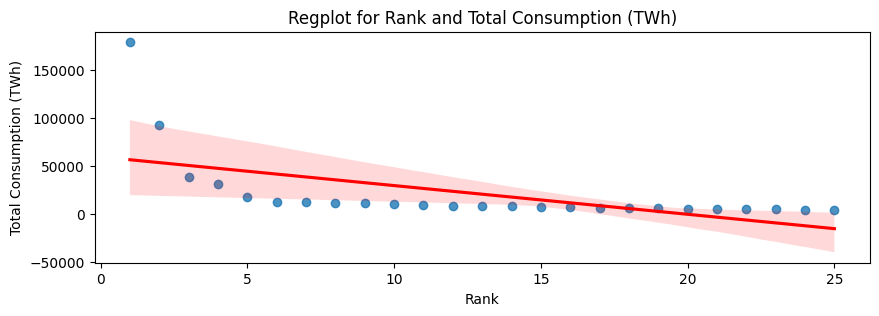

In [56]:
# 1. continuous vs continuous -> scatterplot, regplot
plot_scatter(df, 'Rank', 'Total Consumption (TWh)')
plot_reg(df, 'Rank', 'Total Consumption (TWh)')

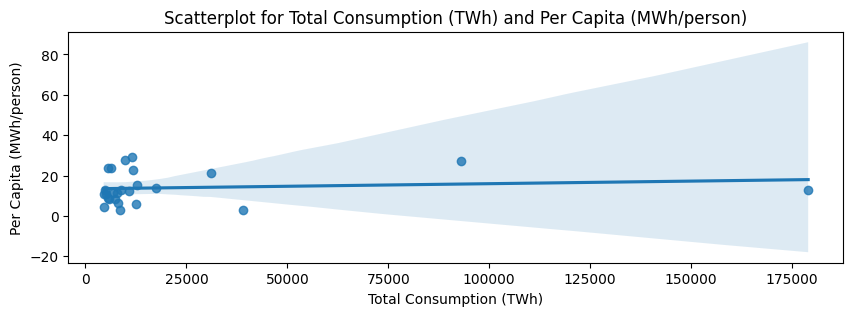

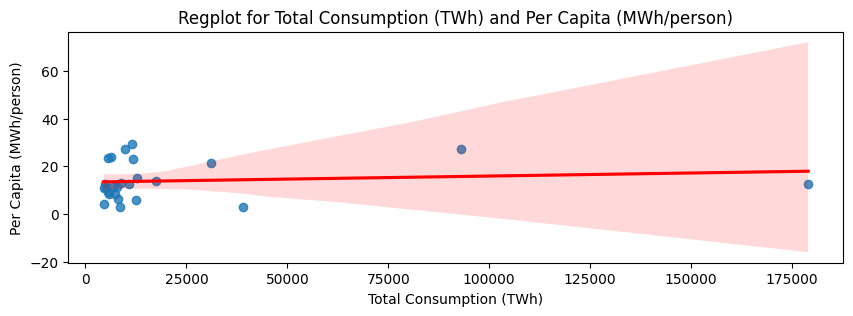

In [57]:
plot_scatter(df, 'Total Consumption (TWh)', 'Per Capita (MWh/person)')
plot_reg(df, 'Total Consumption (TWh)', 'Per Capita (MWh/person)')

In [59]:
# 2. categorical vs continuous -> boxplot
con, cat

(['Rank',
  'Total Consumption (TWh)',
  'Coal (%)',
  'Oil (%)',
  'Natural Gas (%)',
  'Nuclear (%)',
  'Hydro (%)',
  'Other Renewables (%)',
  'Biomass/Traditional (%)',
  'Per Capita (MWh/person)'],
 ['Country',
  'Coal_Source_Type',
  'Oil_Source_Type',
  'Natural_Gas_Source_Type',
  'Nuclear_Source_Type',
  'Hydro_Source_Type',
  'Other_Renewables_Source_Type',
  'Biomass_Source_Type'])

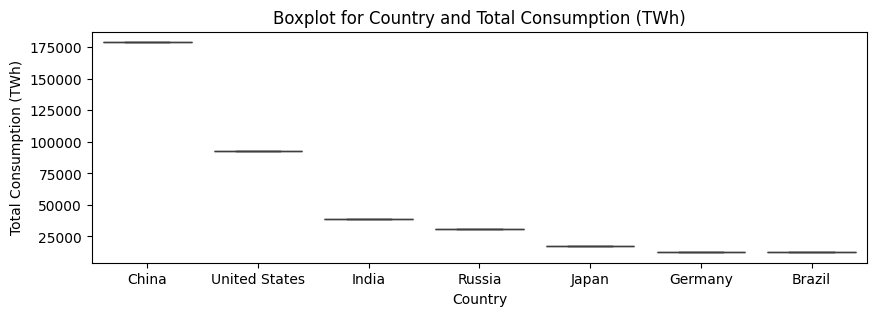

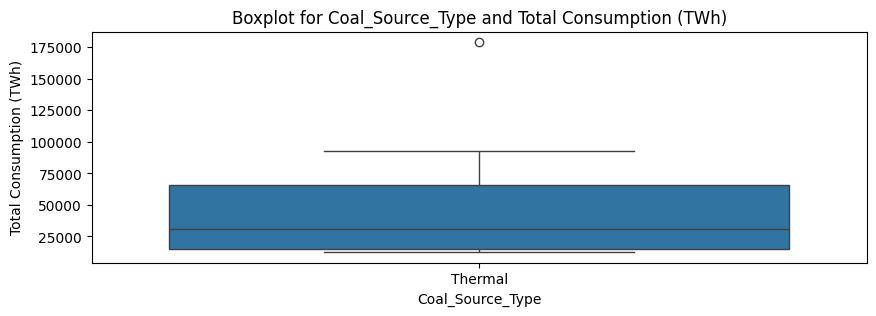

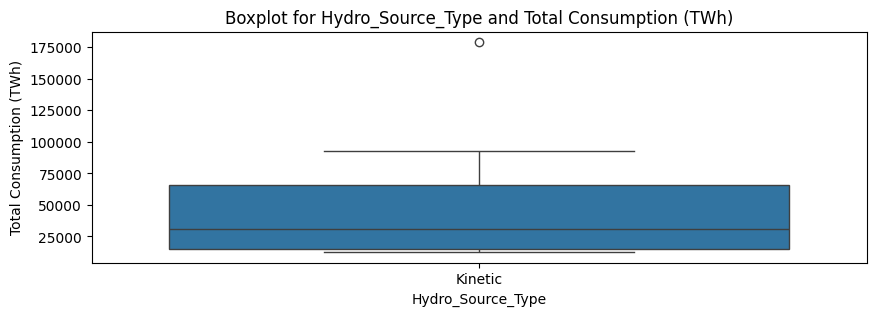

In [61]:
plot_box(df.head(7), 'Country', 'Total Consumption (TWh)')
plot_box(df.head(7), 'Coal_Source_Type', 'Total Consumption (TWh)')
plot_box(df.head(7), 'Hydro_Source_Type', 'Total Consumption (TWh)')

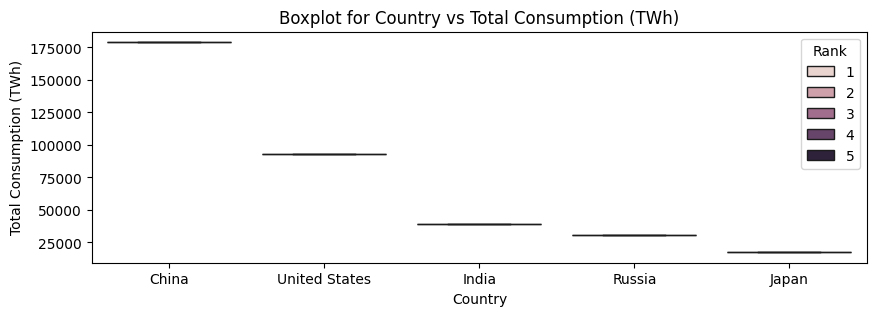

In [67]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df.head(5), x="Country", y="Total Consumption (TWh)", hue="Rank")
plt.title("Boxplot for Country vs Total Consumption (TWh)")
plt.show()

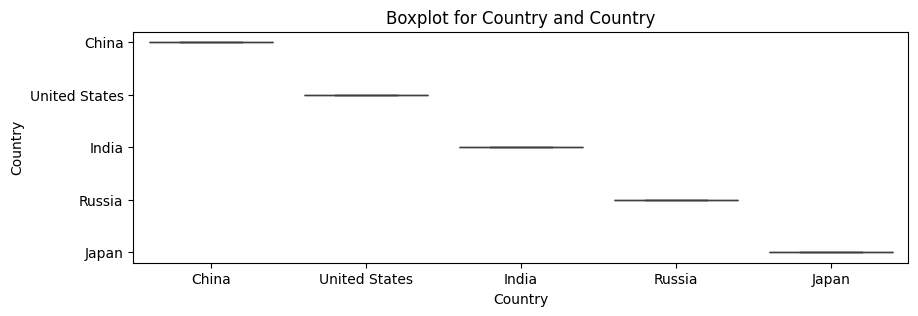

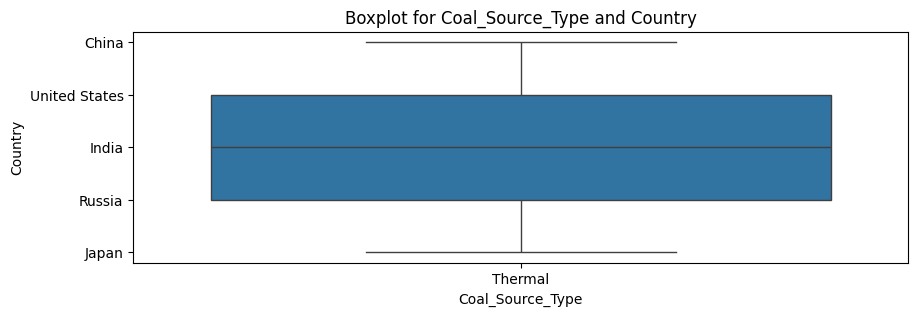

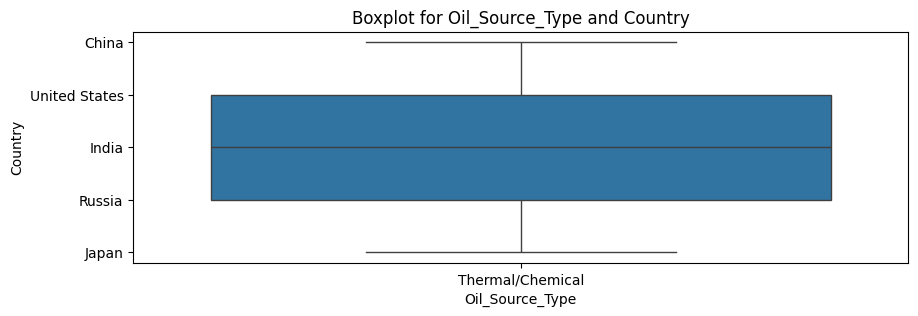

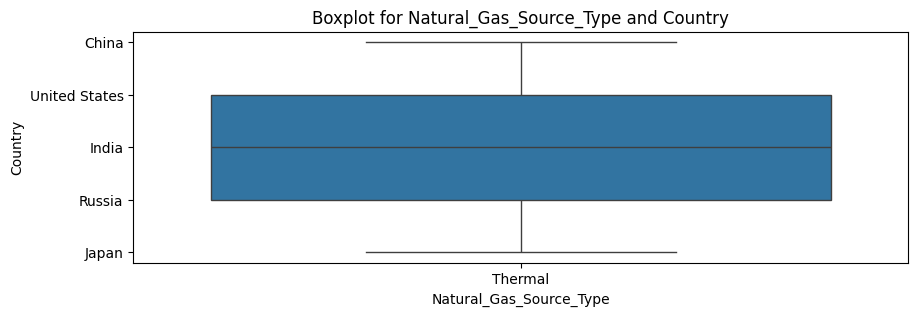

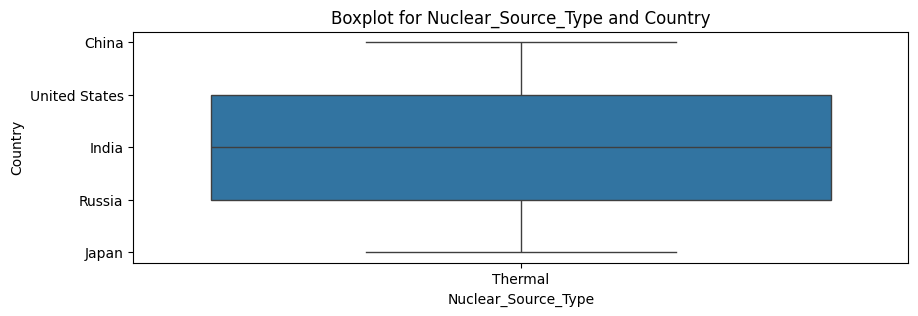

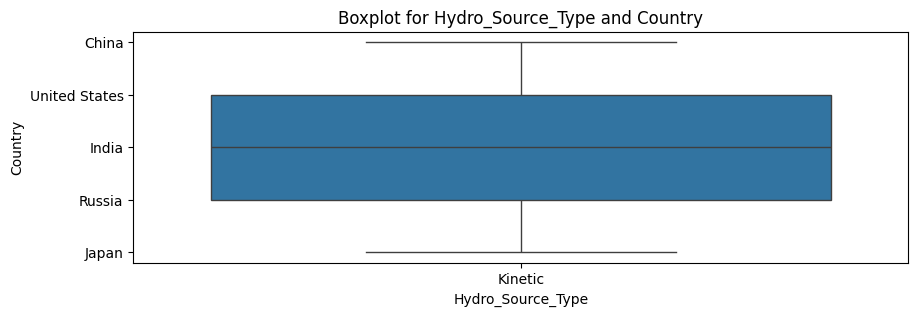

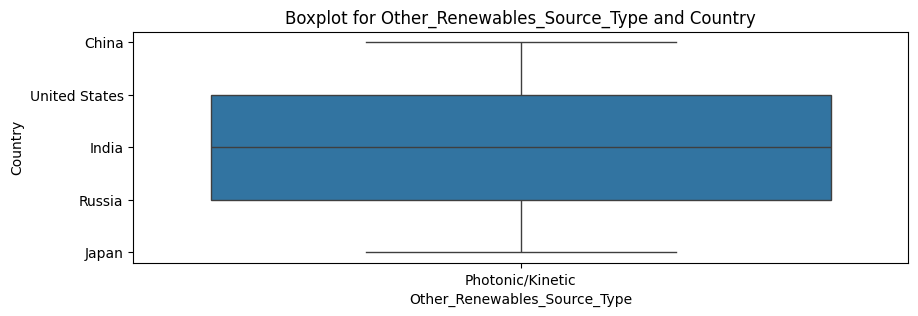

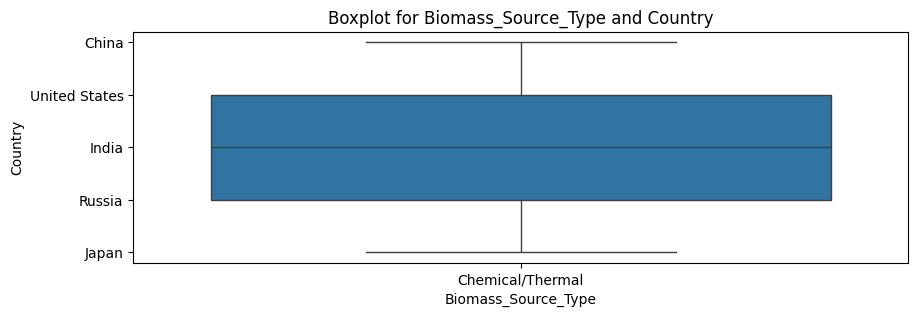

In [70]:
for col in cat:
    plot_box(df.head(5), col, 'Country')

In [71]:
# 3. categorical vs categoric > Crosstab heatmap
def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    print(ctab)
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()
cat

['Country',
 'Coal_Source_Type',
 'Oil_Source_Type',
 'Natural_Gas_Source_Type',
 'Nuclear_Source_Type',
 'Hydro_Source_Type',
 'Other_Renewables_Source_Type',
 'Biomass_Source_Type']

Coal_Source_Type  Thermal
Country                  
China                   1
India                   1
Japan                   1
Russia                  1
United States           1


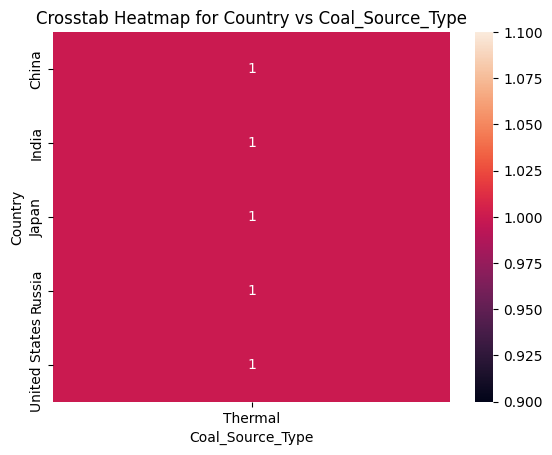

In [76]:
crosstab_heatmap(df.head(5), 'Country', 'Coal_Source_Type')

Biomass_Source_Type  Chemical/Thermal
Country                              
China                               1
India                               1
Japan                               1
Russia                              1
United States                       1


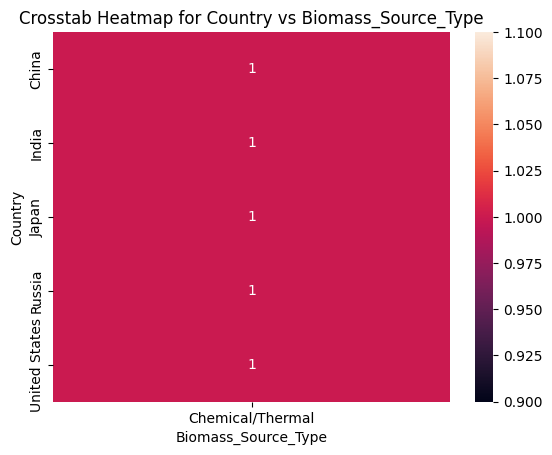

In [77]:
crosstab_heatmap(df.head(5), 'Country', 'Biomass_Source_Type')

In [78]:
# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr

,Rank,Total Consumption (TWh),Coal (%),Oil (%),Natural Gas (%),Nuclear (%),Hydro (%),Other Renewables (%),Biomass/Traditional (%),Per Capita (MWh/person)
Rank,1.000000,-0.583599,0.092623,-0.073183,0.119285,0.105511,-0.197851,-0.285990,-0.263874,-0.254064
Total Consumption (TWh),-0.583599,1.000000,0.256498,-0.256896,-0.203992,-0.056190,-0.029155,0.219235,0.036398,0.121791
Coal (%),0.092623,0.256498,1.000000,-0.535014,-0.685491,-0.183115,-0.270811,-0.224240,0.239373,-0.125035
Oil (%),-0.073183,-0.256896,-0.535014,1.000000,0.230137,-0.257132,-0.037092,0.033329,-0.122704,0.190039
Natural Gas (%),0.119285,-0.203992,-0.685491,0.230137,1.000000,-0.126893,-0.056993,-0.271819,-0.379348,0.107145
Nuclear (%),0.105511,-0.056190,-0.183115,-0.257132,-0.126893,1.000000,-0.049824,0.067154,-0.157627,0.103886
Hydro (%),-0.197851,-0.029155,-0.270811,-0.037092,-0.056993,-0.049824,1.000000,0.292579,0.006324,0.113934
Other Renewables (%),-0.285990,0.219235,-0.224240,0.033329,-0.271819,0.067154,0.292579,1.000000,-0.064939,-0.105312
Biomass/Traditional (%),-0.263874,0.036398,0.239373,-0.122704,-0.379348,-0.157627,0.006324,-0.064939,1.000000,-0.446204
Per Capita (MWh/person),-0.254064,0.121791,-0.125035,0.190039,0.107145,0.103886,0.113934,-0.105312,-0.446204,1.000000


In [79]:
corr.loc["Total Consumption (TWh)", "Per Capita (MWh/person)"]

np.float64(0.12179058962126733)

In [80]:
corr.loc["Rank", "Coal (%)"]

np.float64(0.09262347751867425)

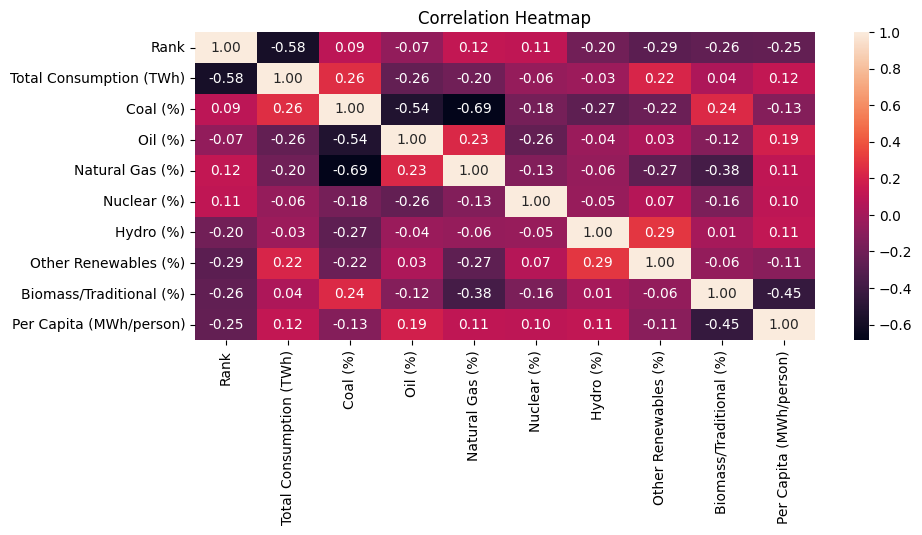

In [81]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

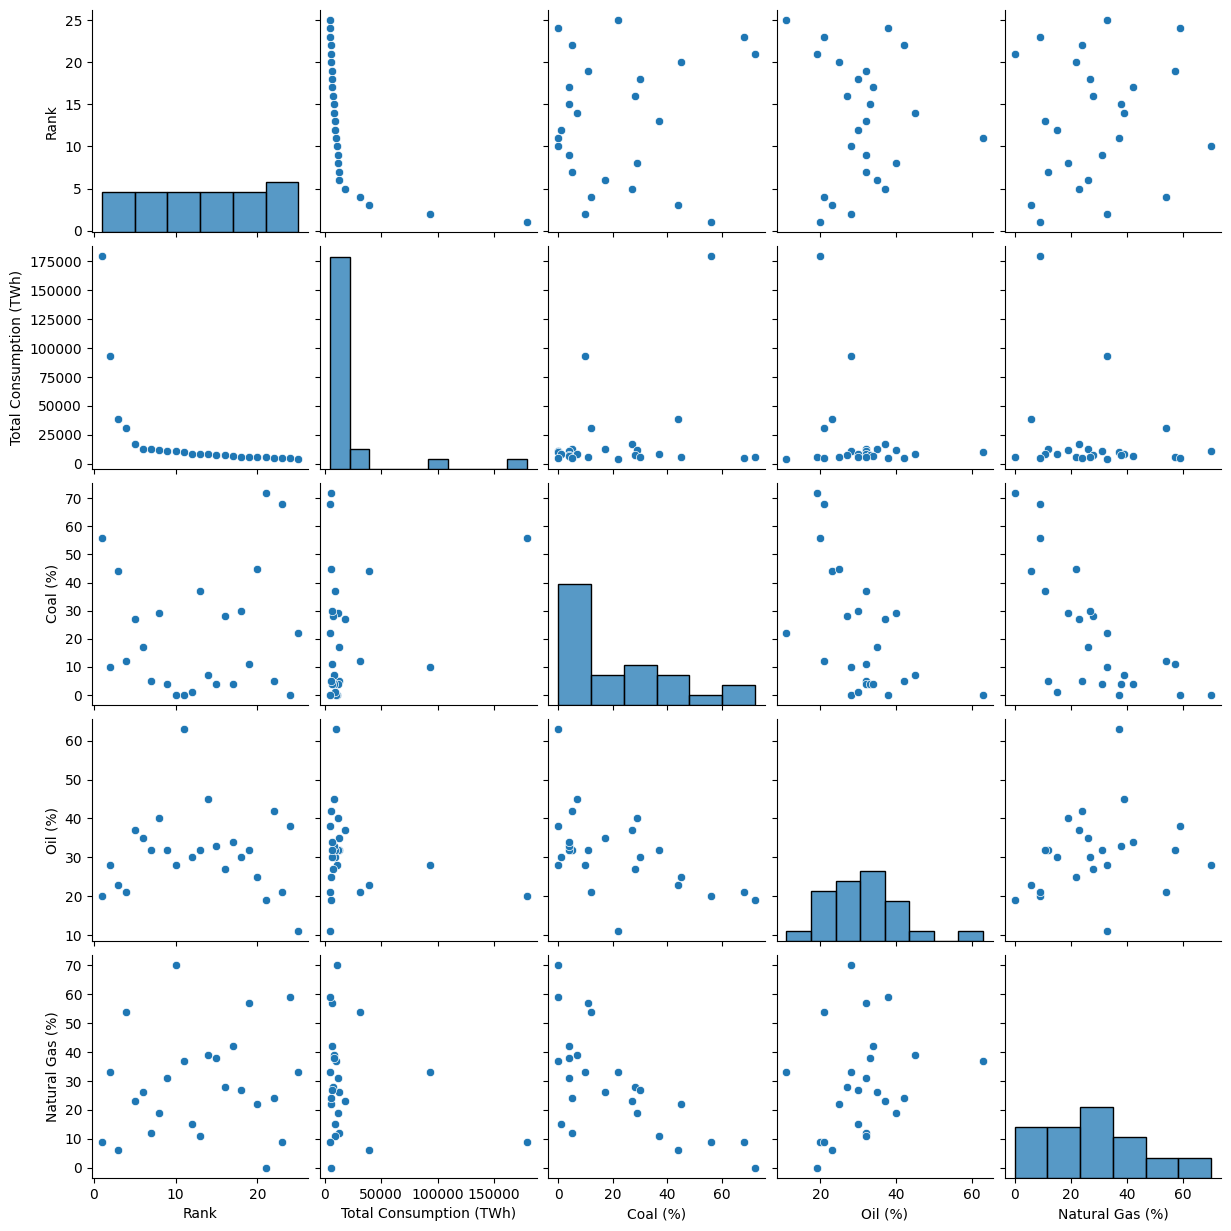

In [84]:
sns.pairplot(df[con[0:5]])

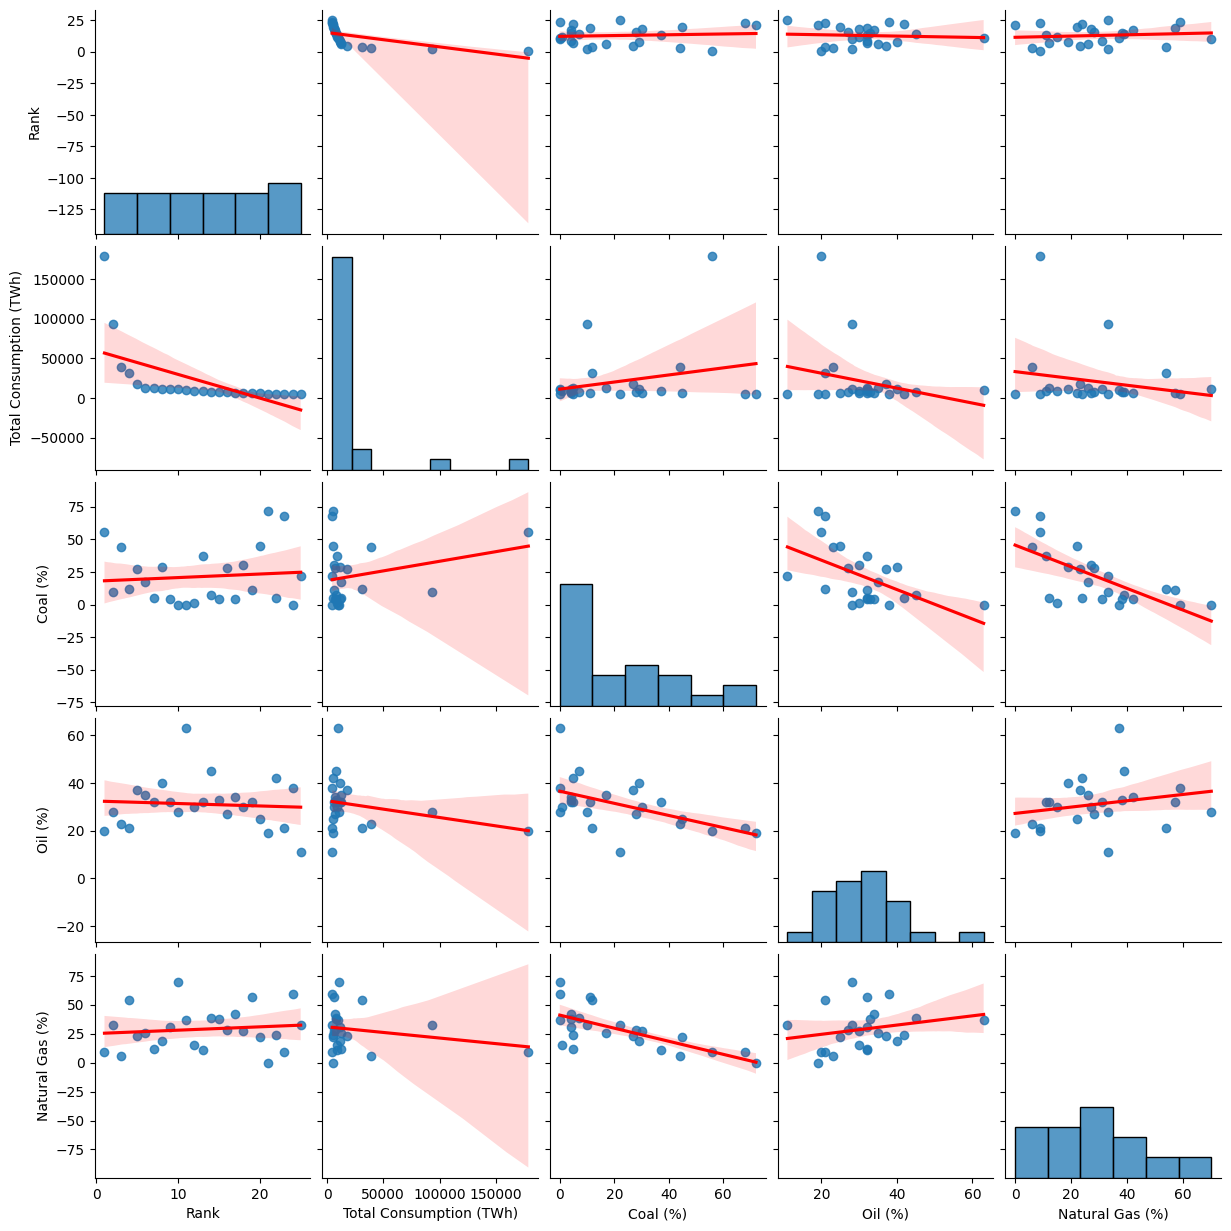

In [85]:
sns.pairplot(df[con[0:5]], kind="reg", plot_kws = {"line_kws": {"color": "red"}})